# PTB-XL, a large publicly available electrocardiography dataset

## Python waveform-database (WFDB) package.
- https://github.com/MIT-LCP/wfdb-python

Install with ==> conda install -c conda-forge wfdb

## LIbraries and main functions

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import wfdb
# from wfdb import processing
import ast

In [1]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [3]:
plt.rcParams["figure.figsize"] = (20,10)

In [4]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [5]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [6]:
def plot_sample_lead(data, sample, lead):
    lead = lead.lower()
    if lead == 'i': ld = 0
    if lead == 'ii': ld = 1
    if lead == 'iii': ld = 2
    if lead == 'avr': ld = 3
    if lead == 'avl': ld = 4
    if lead == 'avf': ld = 5
    if lead == 'v1': ld = 6
    if lead == 'v2': ld = 7
    if lead == 'v3': ld = 8
    if lead == 'v4': ld = 9
    if lead == 'v5': ld = 10
    if lead == 'v6': ld = 11
    
    plt.plot(data[:,:,ld][sample], label=lead.upper())
    plt.legend(loc="upper left");

## Dataset
- [PTB-XL, a large publicly available electrocardiography dataset](https://physionet.org/content/ptb-xl/1.0.1/)

**Abstract**

- 21,837 clinical 12-lead ECGs from 18,885 patients of 10 second length. 
- Gender: 52% are male and 48% are female 
- Ages covering the whole range from 0 to 95 years (median 62 and interquantile range of 22)
- WaveForm DataBase (WFDB) format with 16 bit precision at a resolution of 1μV/LSB and a sampling frequency of 500Hz (records500/). For the user’s convenience we also release a downsampled versions of the waveform data at a sampling frequency of 100Hz (records100/).
- The raw waveform data was annotated by up to two cardiologists, who assigned potentially multiple ECG statements to each record. 
- The in total 71 different ECG statements conform to the SCP-ECG standard and cover diagnostic, form, and rhythm statements. 
- The dataset is complemented by extensive metadata on demographics, infarction characteristics, likelihoods for diagnostic ECG statements as well as annotated signal properties.

**Data Acquisition**
- Raw signal data was recorded and stored in a proprietary compressed format. 
- For all signals, we provide the standard set of 12 leads (I, II, III, AVL, AVR, AVF, V1, ..., V6) with reference electrodes on the right arm.
- The corresponding general metadata (such as age, sex, weight and height) was collected in a database.
- Each record was annotated with a report string (generated by cardiologist or automatic interpretation by ECG-device) which was converted into a standardized set of SCP-ECG statements (scp_codes). 
- For most records also the heart’s axis (heart_axis) and infarction stadium (infarction_stadium1 and infarction_stadium2, if present) were extracted.

**Data Preprocessing**
- ECGs and patients are identified by unique identifiers (ecg_id and patient_id). 
- Personal information in the metadata, such as names of validating cardiologists, nurses and recording site (hospital etc.) of the recording was pseudonymized. 
- The date of birth only as age at the time of the ECG recording, where ages of more than 89 years appear in the range of 300 years in compliance with HIPAA standards. 
- Furthermore, all ECG recording dates were shifted by a random offset for each patient. The ECG statements used for annotating the records follow the SCP-ECG standard.

**Records - Superclass:	Description**
- 9,528	- NORM: Normal ECG
- 5,486	- MI: Myocardial Infarction
- 5,250	- STTC: ST/T Change
- 4,907	- CD: Conduction Disturbance
- 2,655	- HYP: Hypertrophy

In [8]:
!ls ./data/

ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1


In [9]:
!ls ./data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1

LICENSE.txt          example_physionet.py records500
RECORDS              ptbxl_database.csv   scp_statements.csv
SHA256SUMS.txt       records100


In [8]:
path = ''
sampling_rate=100

### load and convert annotation data

In [9]:
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [12]:
Y.shape

(21837, 27)

In [13]:
Y.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [14]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21837 entries, 1 to 21837
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    21837 non-null  float64
 1   age                           21748 non-null  float64
 2   sex                           21837 non-null  int64  
 3   height                        6983 non-null   float64
 4   weight                        9429 non-null   float64
 5   nurse                         20328 non-null  float64
 6   site                          21819 non-null  float64
 7   device                        21837 non-null  object 
 8   recording_date                21837 non-null  object 
 9   report                        21837 non-null  object 
 10  scp_codes                     21837 non-null  object 
 11  heart_axis                    13332 non-null  object 
 12  infarction_stadium1           5626 non-null   object 
 13  i

In [131]:
Y[['age', 'sex', 'height', 'weight']].describe()

,age,sex,height,weight
count,21748.000000,21837.000000,6983.000000,9429.000000
mean,59.836307,0.478912,166.708292,70.997561
std,16.953125,0.499567,10.864935,15.875146
min,2.000000,0.000000,6.000000,5.000000
25%,50.000000,0.000000,160.000000,60.000000
50%,62.000000,0.000000,166.000000,70.000000
75%,72.000000,1.000000,174.000000,80.000000
max,95.000000,1.000000,209.000000,250.000000


- `Gender: 48% Female (1) and 53% Male (0)`
- `Average: 60 Years old, 1.67m, 71Kg `

In [35]:
Y.scp_codes[0:30]

ecg_id
1       {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
2                   {'NORM': 80.0, 'SBRAD': 0.0}
3                     {'NORM': 100.0, 'SR': 0.0}
4                     {'NORM': 100.0, 'SR': 0.0}
5                     {'NORM': 100.0, 'SR': 0.0}
6                     {'NORM': 100.0, 'SR': 0.0}
7                     {'NORM': 100.0, 'SR': 0.0}
8         {'IMI': 35.0, 'ABQRS': 0.0, 'SR': 0.0}
9                     {'NORM': 100.0, 'SR': 0.0}
10                    {'NORM': 100.0, 'SR': 0.0}
11                  {'NORM': 80.0, 'SARRH': 0.0}
12                  {'NORM': 80.0, 'SBRAD': 0.0}
13                    {'NORM': 100.0, 'SR': 0.0}
14                    {'NORM': 100.0, 'SR': 0.0}
15                 {'NORM': 100.0, 'SARRH': 0.0}
16                    {'NORM': 100.0, 'SR': 0.0}
17    {'AFLT': 100.0, 'ABQRS': 0.0, 'AFIB': 0.0}
18                               {'AFLT': 100.0}
19                    {'NORM': 100.0, 'SR': 0.0}
20                 {'AFLT': 100.0, 'ABQRS': 0.0}
21           

### Load raw signal data

In [ ]:
X = load_raw_data(Y, sampling_rate, path)

In [16]:
X.shape

(21837, 1000, 12)

In [17]:
dt_I = X[:,:,0] #Lead I

In [18]:
dt_I.shape

(21837, 1000)

### View Signals 

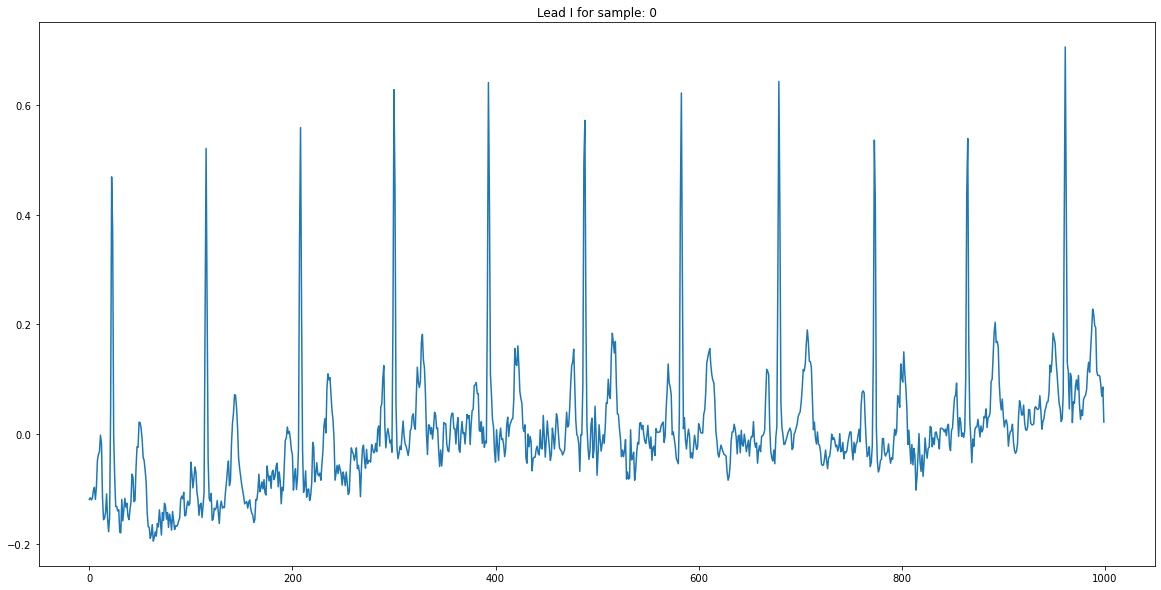

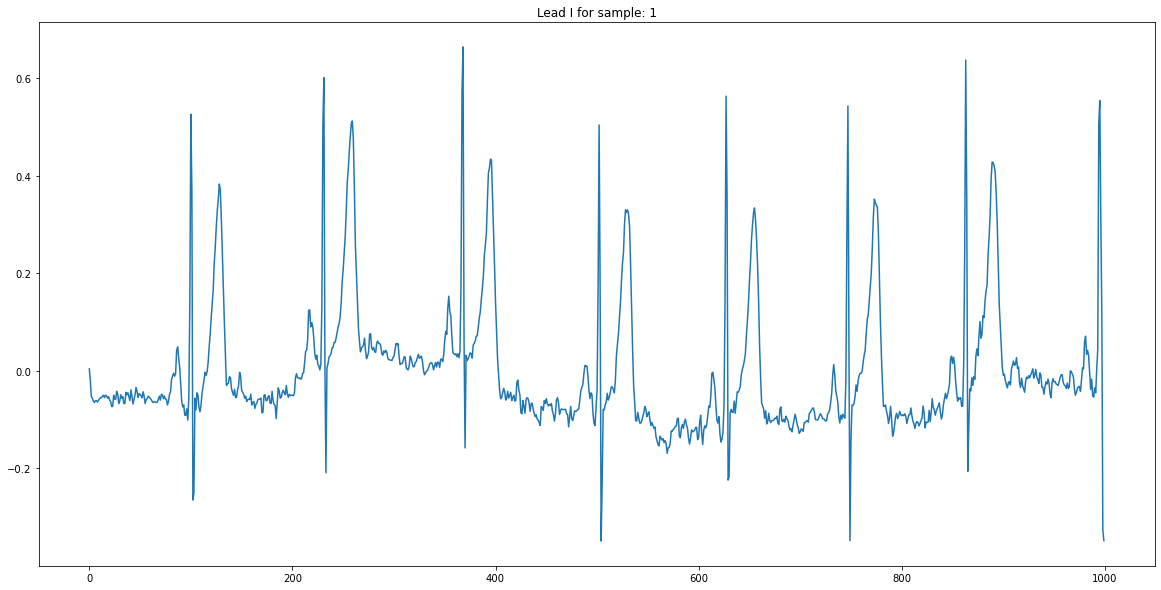

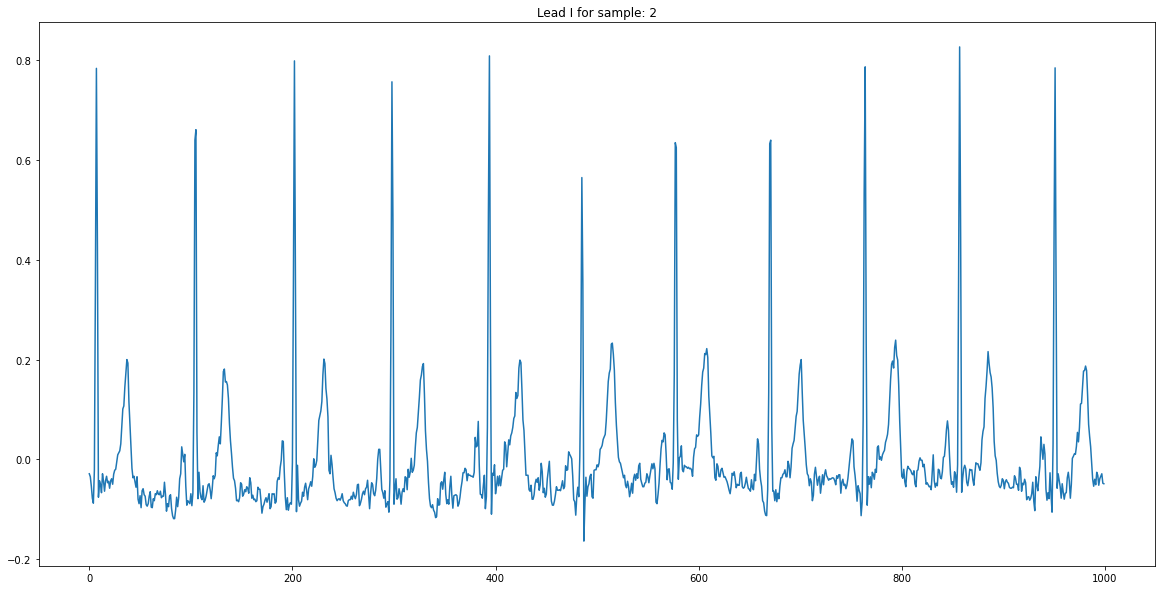

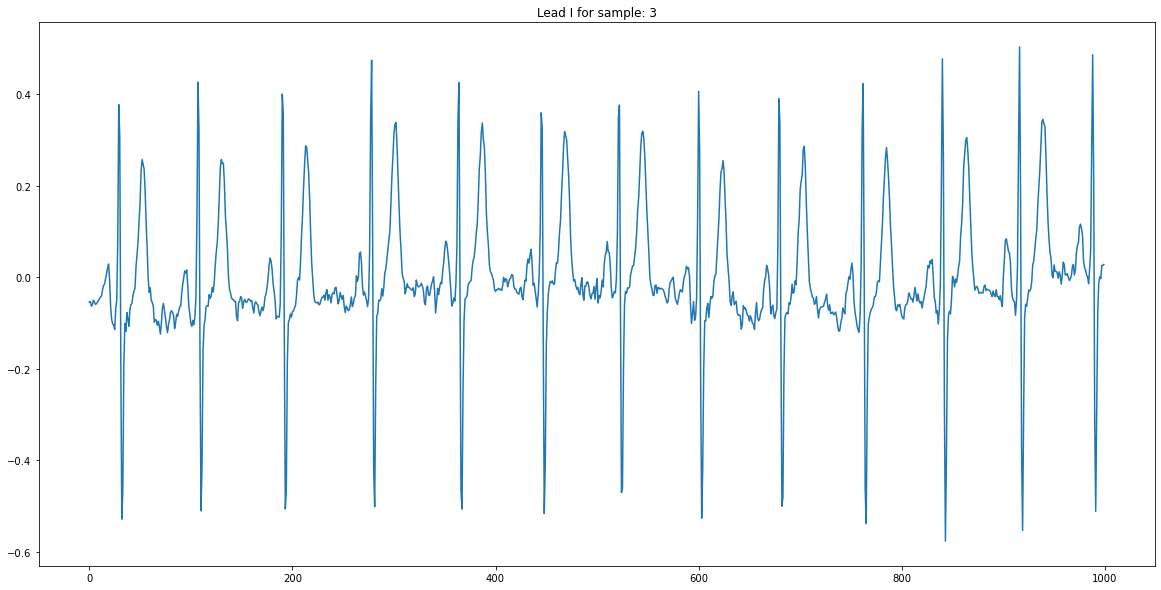

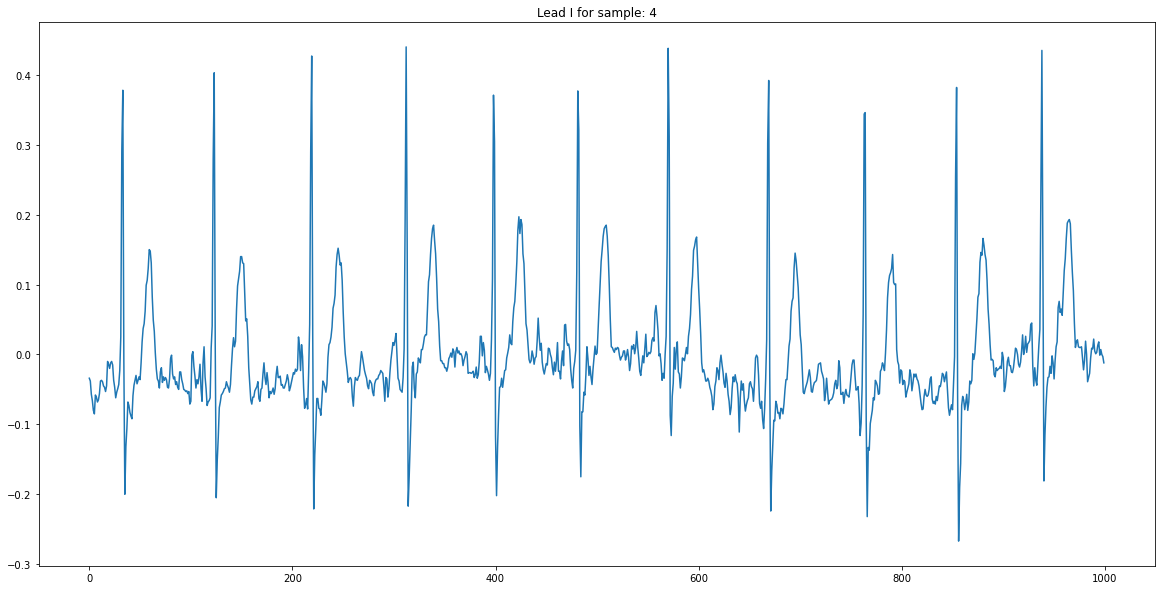

In [19]:
for i in range (5):
    plt.plot(dt_I[i], label="Lead I")
    plt.title("Lead I for sample: "+str(i))
    plt.show()

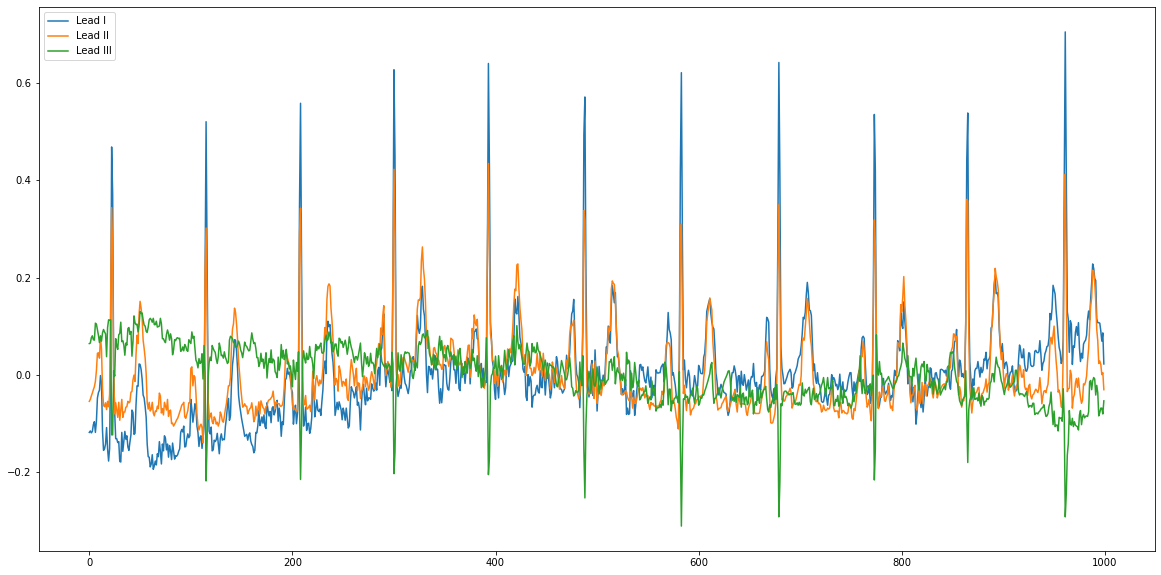

In [20]:
# Plotting 3 leads from first sample
plt.plot(X[:,:,0][0], label="Lead I")
plt.plot(X[:,:,1][0], label="Lead II")
plt.plot(X[:,:,2][0], label="Lead III")
plt.legend(loc="upper left");

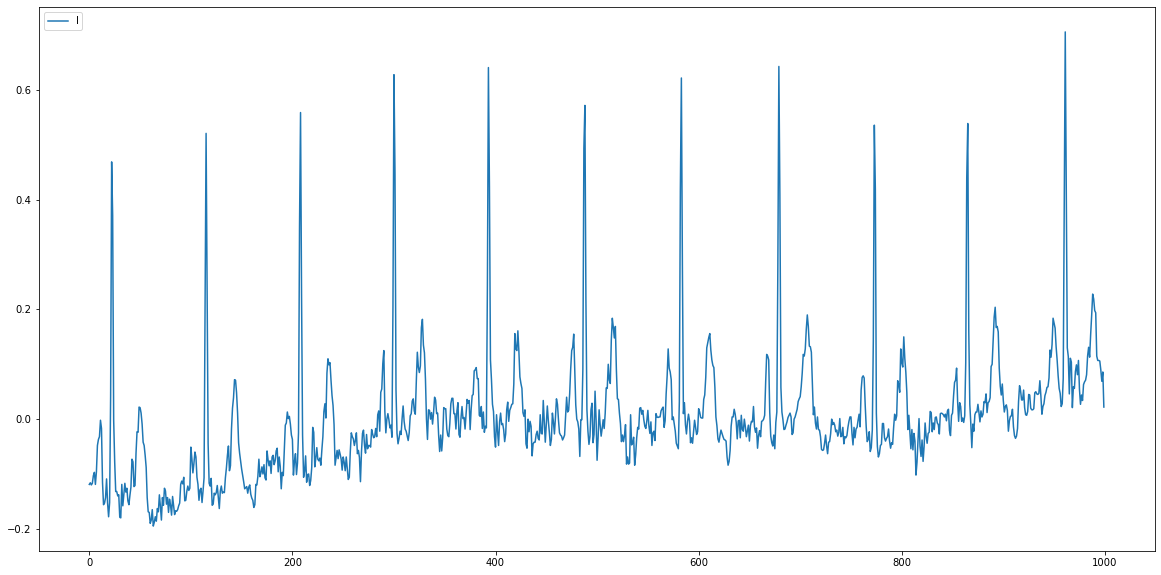

In [21]:
plot_sample_lead(X, 0, 'I')

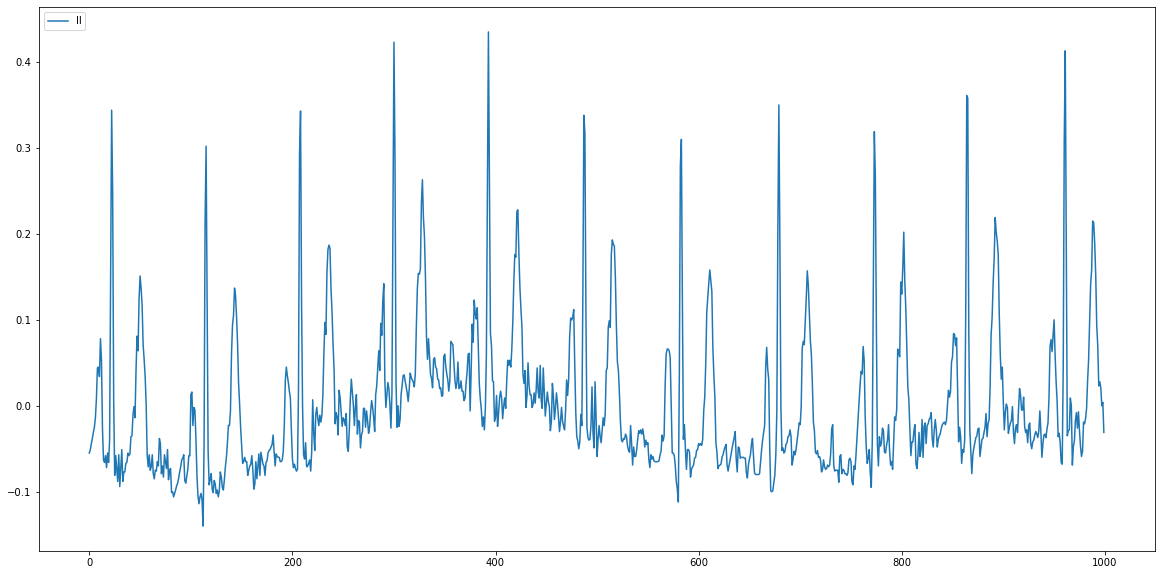

In [22]:
plot_sample_lead(X, 0, 'II')

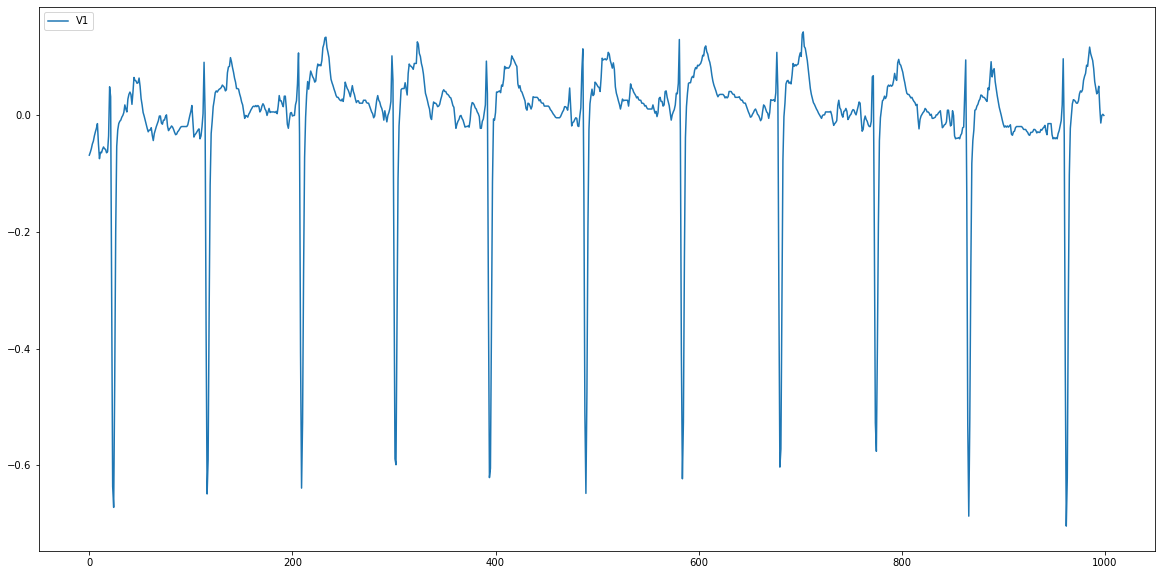

In [23]:
plot_sample_lead(X, 0, 'v1')

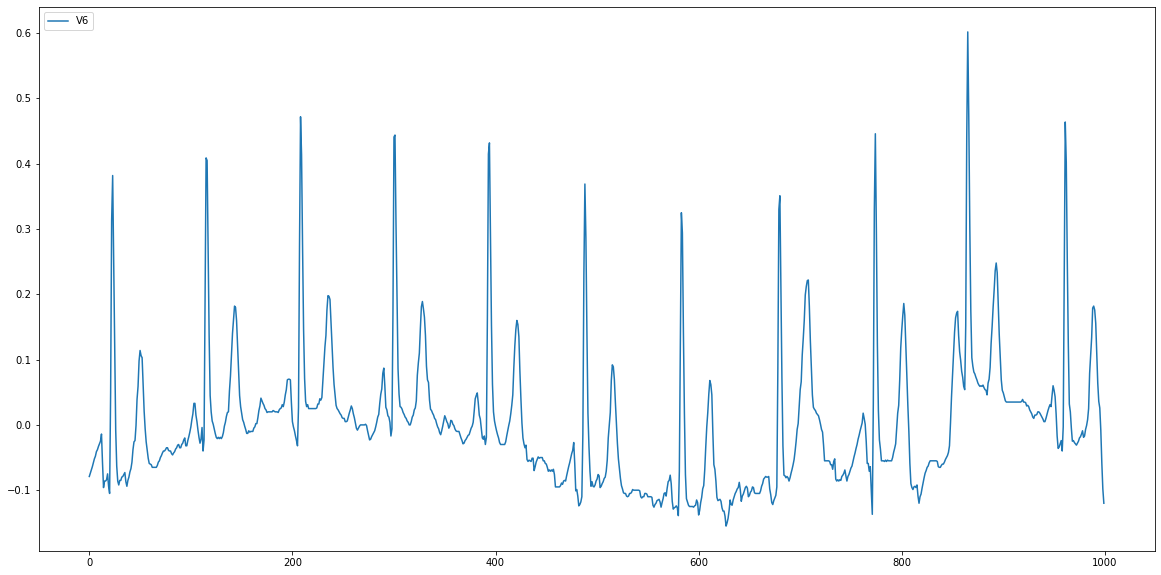

In [24]:
plot_sample_lead(X, 0, 'v6')

### Get Diagnostic

In [25]:
# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)

In [26]:
agg_df.shape

(71, 12)

In [27]:
agg_df.head()

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [113]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, NDT to TRIGU
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   description                    71 non-null     object 
 1   diagnostic                     44 non-null     float64
 2   form                           19 non-null     float64
 3   rhythm                         12 non-null     float64
 4   diagnostic_class               44 non-null     object 
 5   diagnostic_subclass            44 non-null     object 
 6   Statement Category             71 non-null     object 
 7   SCP-ECG Statement Description  71 non-null     object 
 8   AHA code                       37 non-null     float64
 9   aECG REFID                     23 non-null     object 
 10  CDISC Code                     13 non-null     object 
 11  DICOM Code                     13 non-null     object 
dtypes: float64(4), object(8)
memory usage: 7.2+ KB


<img src="./images/SCP_ECG_statements.png">

In [28]:
agg_df = agg_df[agg_df.diagnostic == 1]

In [36]:
agg_df

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
IMI,inferior myocardial infarction,1.0,NaN,NaN,MI,IMI,Myocardial Infarction,inferior myocardial infarction,161.0,NaN,NaN,NaN
ASMI,anteroseptal myocardial infarction,1.0,NaN,NaN,MI,AMI,Myocardial Infarction,anteroseptal myocardial infarction,165.0,NaN,NaN,NaN
LVH,left ventricular hypertrophy,1.0,NaN,NaN,HYP,LVH,Ventricular Hypertrophy,left ventricular hypertrophy,142.0,NaN,C71076,NaN
LAFB,left anterior fascicular block,1.0,NaN,NaN,CD,LAFB/LPFB,Intraventricular and intra-atrial Conduction d...,left anterior fascicular block,101.0,MDC_ECG_BEAT_BLK_ANT_L_HEMI,C62267,D3-33140
ISC_,non-specific ischemic,1.0,NaN,NaN,STTC,ISC_,Basic roots for coding ST-T changes and abnorm...,ischemic ST-T changes,226.0,NaN,NaN,NaN


In [37]:
# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

In [38]:
Y.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]


In [40]:
Y['diagnostic_superclass'].tail(10)

ecg_id
21828    [STTC, MI]
21829    [CD, NORM]
21830        [NORM]
21831        [NORM]
21832          [CD]
21833        [STTC]
21834        [NORM]
21835        [STTC]
21836        [NORM]
21837        [NORM]
Name: diagnostic_superclass, dtype: object

In [41]:
Y['diagnostic_superclass'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[NORM]                 9083
[MI]                   2538
[STTC]                 2406
[CD]                   1709
[CD, MI]               1302
[HYP, STTC]             783
[STTC, MI]              598
[HYP]                   536
[CD, STTC]              472
[]                      407
[CD, NORM]              407
[STTC, HYP, MI]         359
[HYP, CD]               300
[STTC, CD, MI]          223
[HYP, CD, STTC]         211
[HYP, MI]               183
[STTC, HYP, CD, MI]     157
[HYP, CD, MI]           117
[STTC, NORM]             28
[STTC, CD, NORM]          5
[MI, STTC]                4
[MI, HYP, STTC]           3
[HYP, NORM]               2
[HYP, CD, NORM]           2
[MI, HYP, CD, NORM]       1
[MI, HYP, CD, STTC]       1
Name: diagnostic_superclass, dtype: int64

In [20]:
# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass

In [21]:
X_test.shape

(2203, 1000, 12)

In [22]:
X_test[0]

array([[-0.145, -0.097,  0.049, ..., -0.452, -0.269, -0.032],
       [-0.115, -0.083,  0.032, ..., -0.339, -0.246, -0.041],
       [-0.064, -0.06 ,  0.005, ..., -0.188, -0.199, -0.04 ],
       ...,
       [ 0.23 ,  0.292,  0.063, ...,  0.443,  0.362,  0.222],
       [ 0.251,  0.319,  0.067, ...,  0.498,  0.405,  0.261],
       [ 0.338,  0.361,  0.023, ...,  0.515,  0.447,  0.299]])

In [31]:
X_test[0][999][0]

0.338

In [23]:
y_test.shape

(2203,)

In [26]:
y_test

ecg_id
9        [NORM]
38       [NORM]
40       [NORM]
57       [NORM]
59       [NORM]
          ...  
21809    [NORM]
21812      [CD]
21818    [NORM]
21819      [CD]
21826      [MI]
Name: diagnostic_superclass, Length: 2203, dtype: object

## Filtering Rhythm

In [169]:
agg_df_x = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df_x.shape

(71, 12)

In [170]:
agg_df_x = agg_df_x[agg_df_x.rhythm == 1]
agg_df_x.shape

(12, 12)

In [171]:
agg_df_x

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
SR,sinus rhythm,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus rhythm,20.0,MDC_ECG_RHY_SINUS_RHY,NaN,NaN
AFIB,atrial fibrillation,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial fibrillation,50.0,MDC_ECG_RHY_ATR_FIB,NaN,D3-31520
STACH,sinus tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus tachycardia,21.0,MDC_ECG_RHY_SINUS_TACHY,NaN,NaN
SARRH,sinus arrhythmia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus arrhythmia,23.0,MDC_ECG_RHY_SINUS_ARRHY,NaN,NaN
SBRAD,sinus bradycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus bradycardia,22.0,MDC_ECG_RHY_SINUS_BRADY,NaN,NaN
PACE,normal functioning artificial pacemaker,NaN,NaN,1.0,NaN,NaN,Pacemaker types and pacemaker function,normal functioning artificial pacemaker,NaN,NaN,NaN,NaN
SVARR,supraventricular arrhythmia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular arrhythmia,NaN,NaN,NaN,NaN
BIGU,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,1.0,NaN,NaN,Statements related to ectopic rhythm abnormali...,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,NaN,NaN
AFLT,atrial flutter,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial flutter,51.0,MDC_ECG_RHY_ATR_FLUT,NaN,NaN
SVTAC,supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular tachycardia,55.0,MDC_ECG_RHY_SV_TACHY,NaN,D3-31290


In [172]:
agg_df_x['rhythm_statement'] = agg_df_x.index

In [173]:
agg_df_x

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code,rhythm_statement
SR,sinus rhythm,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus rhythm,20.0,MDC_ECG_RHY_SINUS_RHY,NaN,NaN,SR
AFIB,atrial fibrillation,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial fibrillation,50.0,MDC_ECG_RHY_ATR_FIB,NaN,D3-31520,AFIB
STACH,sinus tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus tachycardia,21.0,MDC_ECG_RHY_SINUS_TACHY,NaN,NaN,STACH
SARRH,sinus arrhythmia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus arrhythmia,23.0,MDC_ECG_RHY_SINUS_ARRHY,NaN,NaN,SARRH
SBRAD,sinus bradycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,sinus bradycardia,22.0,MDC_ECG_RHY_SINUS_BRADY,NaN,NaN,SBRAD
PACE,normal functioning artificial pacemaker,NaN,NaN,1.0,NaN,NaN,Pacemaker types and pacemaker function,normal functioning artificial pacemaker,NaN,NaN,NaN,NaN,PACE
SVARR,supraventricular arrhythmia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular arrhythmia,NaN,NaN,NaN,NaN,SVARR
BIGU,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,1.0,NaN,NaN,Statements related to ectopic rhythm abnormali...,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,NaN,NaN,BIGU
AFLT,atrial flutter,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial flutter,51.0,MDC_ECG_RHY_ATR_FLUT,NaN,NaN,AFLT
SVTAC,supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular tachycardia,55.0,MDC_ECG_RHY_SV_TACHY,NaN,D3-31290,SVTAC


In [174]:
agg_df_x.rhythm_statement.value_counts()

PACE     1
AFLT     1
TRIGU    1
SVTAC    1
PSVT     1
SARRH    1
STACH    1
SBRAD    1
SR       1
BIGU     1
SVARR    1
AFIB     1
Name: rhythm_statement, dtype: int64

In [175]:
def aggregate_rhythm(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df_x.index:
            tmp.append(agg_df_x.loc[key].rhythm_statement)
    return list(set(tmp))

In [176]:
YI = Y.copy()

In [177]:
YI.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]


In [178]:
YI['rhythm_class'] = YI.scp_codes.apply(aggregate_rhythm)

In [179]:
YI.shape

(21837, 29)

In [180]:
YI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21837 entries, 1 to 21837
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    21837 non-null  float64
 1   age                           21748 non-null  float64
 2   sex                           21837 non-null  int64  
 3   height                        6983 non-null   float64
 4   weight                        9429 non-null   float64
 5   nurse                         20328 non-null  float64
 6   site                          21819 non-null  float64
 7   device                        21837 non-null  object 
 8   recording_date                21837 non-null  object 
 9   report                        21837 non-null  object 
 10  scp_codes                     21837 non-null  object 
 11  heart_axis                    13332 non-null  object 
 12  infarction_stadium1           5626 non-null   object 
 13  i

In [181]:
YI['rhythm_class'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[SR]                 16721
[AFIB]                1484
[STACH]                805
[]                     771
[SARRH]                765
[SBRAD]                629
[PACE]                 287
[SVARR]                150
[BIGU, SR]              37
[AFLT]                  36
[BIGU]                  22
[AFIB, AFLT]            17
[TRIGU, SR]             11
[STACH, BIGU]           11
[PSVT]                  10
[SVTAC]                 10
[SVTAC, PSVT]            8
[SVTAC, AFLT]            6
[STACH, AFLT]            5
[AFIB, BIGU]             4
[SVARR, AFLT]            4
[AFIB, PACE]             4
[TRIGU]                  4
[STACH, TRIGU]           4
[BIGU, AFIB]             3
[SR, AFLT]               3
[PACE, SR]               3
[SARRH, SBRAD]           3
[BIGU, SBRAD]            3
[BIGU, SARRH]            2
[PACE, SBRAD]            2
[AFLT, SR]               2
[SVARR, PSVT]            2
[SARRH, SR]              2
[AFIB, PSVT]             1
[SVARR, TRIGU]           1
[PSVT, SR]               1
[

In [182]:
type(YI.rhythm_class[1])

list

In [183]:
YI.rhythm_class[:10]

ecg_id
1        [SR]
2     [SBRAD]
3        [SR]
4        [SR]
5        [SR]
6        [SR]
7        [SR]
8        [SR]
9        [SR]
10       [SR]
Name: rhythm_class, dtype: object

In [184]:
if 'SR' in YI.rhythm_class[1]: print('SR')
elif 'AFIB' in YI.rhythm_class[1]: print('AFIB')
else: print ('OTHER')

SR


In [185]:
if 'SR' in YI.rhythm_class[2]: print('SR')
elif 'AFIB' in YI.rhythm_class[2]: print('AFIB')
else: print ('OTHER')

OTHER


In [186]:
def get_diag(x_lst):
    if 'SR' in x_lst:
        diag = 'SR'
    elif 'AFIB' in x_lst:
        diag = 'AFIB'
    else:
        diag = 'OTHER'
    return diag

In [187]:
YI['rhythm_diag'] = YI.rhythm_class.apply(get_diag)

In [188]:
YI.head(2)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass,rhythm_class,rhythm_diag
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM],[SR],SR
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM],[SBRAD],OTHER


In [189]:
YI.rhythm_diag.value_counts()

SR       16782
OTHER     3541
AFIB      1514
Name: rhythm_diag, dtype: int64

**pacemaker**

In [190]:
YI[YI.rhythm_diag == 'SR'].pacemaker.value_counts()

ja, nan          3
PACE????, nan    2
ja, pacemaker    1
?, nan           1
Name: pacemaker, dtype: int64

In [191]:
YI[YI.rhythm_diag == 'AFIB'].pacemaker.value_counts()

ja, pacemaker    3
Name: pacemaker, dtype: int64

**electrodes_problems**

In [192]:
YI[YI.rhythm_diag == 'SR'].electrodes_problems.value_counts()

V6                          5
V4                          4
Elektroden vertauscht???    1
V1                          1
Kontaktprobleme aVL ???     1
V5                          1
I???                        1
V3,V4-V6                    1
v6????                      1
V1???                       1
V5,V6                       1
Name: electrodes_problems, dtype: int64

In [193]:
YI[YI.rhythm_diag == 'AFIB'].electrodes_problems.value_counts()

V1    1
Name: electrodes_problems, dtype: int64

**static_noise** and **burst_noise**

In [194]:
YI[YI.rhythm_diag == 'SR'].static_noise.value_counts()

 , I-AVR,            785
 , I-AVF,            737
 , alles,            350
 , I-V1,             115
 , I-V2,             104
                    ... 
 , AVF,                1
alle,  ,               1
 , II,III,AVF,         1
 , I-AVF,V4-V6,        1
 , I.II,               1
Name: static_noise, Length: 104, dtype: int64

In [195]:
YI[YI.rhythm_diag == 'AFIB'].static_noise.value_counts()

 , alles,                     69
 , I-AVF,                     65
 , I-AVR,                     38
 , I-V1,                      22
 , I-V2,                      21
 , mittel,                     8
 , leicht,                     6
 , I-AVL,                      5
 , alles, noisy recording,     4
 , I-V3,                       2
 , I,II,                       2
 , noisy recording,            2
 , V6,                         2
I,III,AVF,AVL,V2,  ,           1
 , V2,                         1
 , I,II,AVL,AVR,               1
 , I,III,V5,                   1
 , noise,                      1
V1,  ,                         1
 , I,II,AVR,                   1
 , I,                          1
 , I,II,AVR,V1,                1
 , V1,V2,                      1
 , I - AVF,                    1
 , I,II,III,AVL,               1
 , V1,                         1
 , stark,                      1
 , I -AVF,                     1
 , V5,V6,                      1
 , I,II,AVL-AVF,               1
 , I - AVR

In [196]:
YI[YI.rhythm_diag == 'SR'].burst_noise.value_counts()

alles        93
I-AVF        41
I-AVR        18
V1           18
V2           18
             ..
I-Avf         1
I-V3          1
I,III-AVL     1
II,AVR-V3     1
V5,6          1
Name: burst_noise, Length: 78, dtype: int64

In [197]:
YI[YI.rhythm_diag == 'AFIB'].burst_noise.value_counts()

V1              27
V1,V2           25
alles           22
I-V1             7
I-V2             5
I-V3             4
I-AVF            3
v6               3
I-V5             2
II               2
II,III,V1,V2     2
V2               2
v4, v5           1
II,V1,V2         1
III,V1           1
II-AVL,V1,V2     1
I,III,AVL        1
II-V1            1
v3               1
v1-6             1
V1-V4            1
V1-V5            1
V1,V2,V5         1
V1-V6            1
V3               1
I,II,V1          1
v4,6             1
I,II             1
v1,2             1
alle             1
V1,V5            1
Name: burst_noise, dtype: int64

**pacient metrics overview: age	sex	height	weight**

In [198]:
YI[YI.rhythm_diag == 'SR'][['age', 'sex', 'height', 'weight']].describe()

,age,sex,height,weight
count,16728.000000,16782.000000,5647.000000,7807.000000
mean,58.740256,0.486116,166.579423,71.314589
std,16.578656,0.499822,10.825968,15.781631
min,2.000000,0.000000,6.000000,5.000000
25%,49.000000,0.000000,160.000000,60.000000
50%,60.000000,0.000000,165.000000,70.000000
75%,71.000000,1.000000,174.000000,80.000000
max,95.000000,1.000000,209.000000,250.000000


- `Gender: 49% Female (1) and 51% Male (0)`
- `Average: 59 Years old, 1.67m, 71Kg `

In [199]:
YI[YI.rhythm_diag == 'AFIB'][['age', 'sex', 'height', 'weight']].describe()

,age,sex,height,weight
count,1493.000000,1514.000000,465.000000,469.000000
mean,70.798392,0.442536,168.309677,68.543710
std,12.369000,0.496851,9.614936,16.448206
min,17.000000,0.000000,145.000000,17.000000
25%,63.000000,0.000000,161.000000,57.000000
50%,72.000000,0.000000,168.000000,67.000000
75%,81.000000,1.000000,175.000000,78.000000
max,94.000000,1.000000,192.000000,160.000000


- `Gender: 44% Female (1) and 56% Male (0)`
- `Average: 71 Years old, 1.68m, 69Kg `

In [210]:
df_afib = YI[YI.rhythm_diag == 'AFIB'][['age', 'sex', 'height', 'weight']]
df_sr = YI[YI.rhythm_diag == 'SR'][['age', 'sex', 'height', 'weight']]

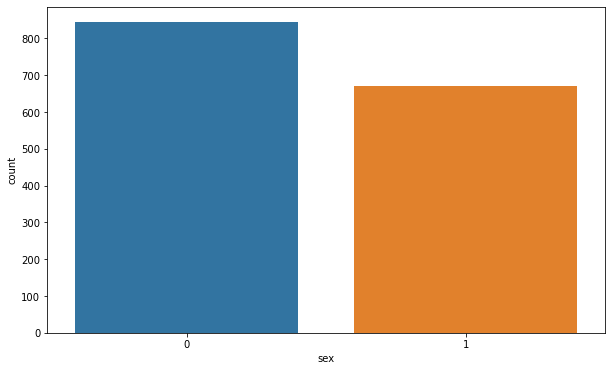

In [221]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex',data=df_afib);

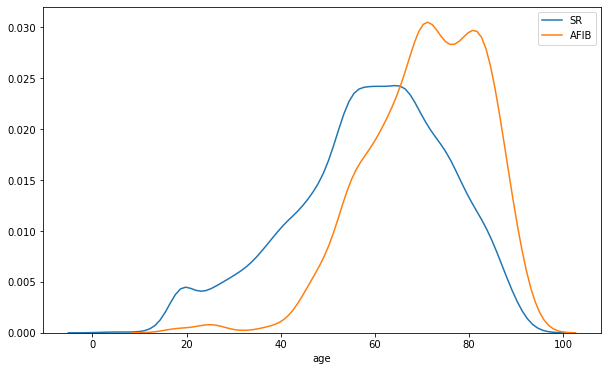

In [216]:
plt.figure(figsize=(10, 6))
sns.distplot(df_sr['age'], hist=False, label='SR')
sns.distplot(df_afib['age'], hist=False, label='AFIB');

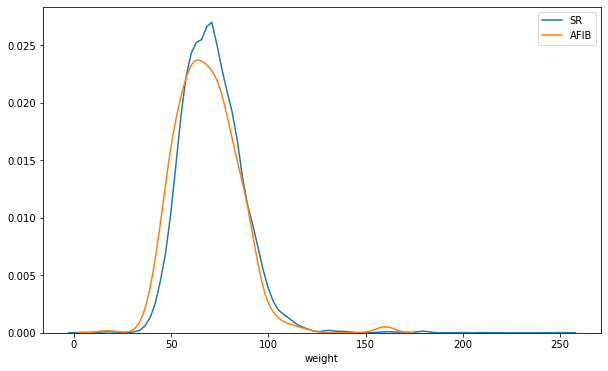

In [218]:
plt.figure(figsize=(10, 6))
sns.distplot(df_sr['weight'], hist=False, label='SR')
sns.distplot(df_afib['weight'], hist=False, label='AFIB');

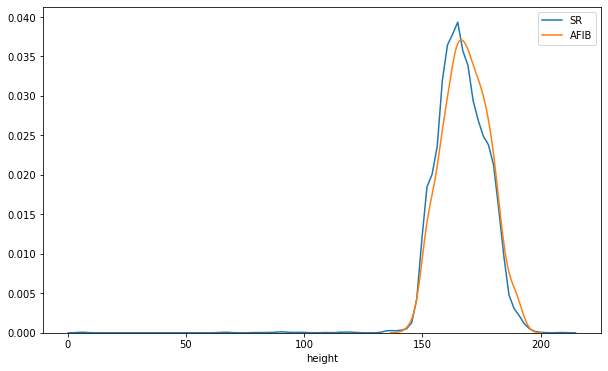

In [219]:
plt.figure(figsize=(10, 6))
sns.distplot(df_sr['height'], hist=False, label='SR')
sns.distplot(df_afib['height'], hist=False, label='AFIB');

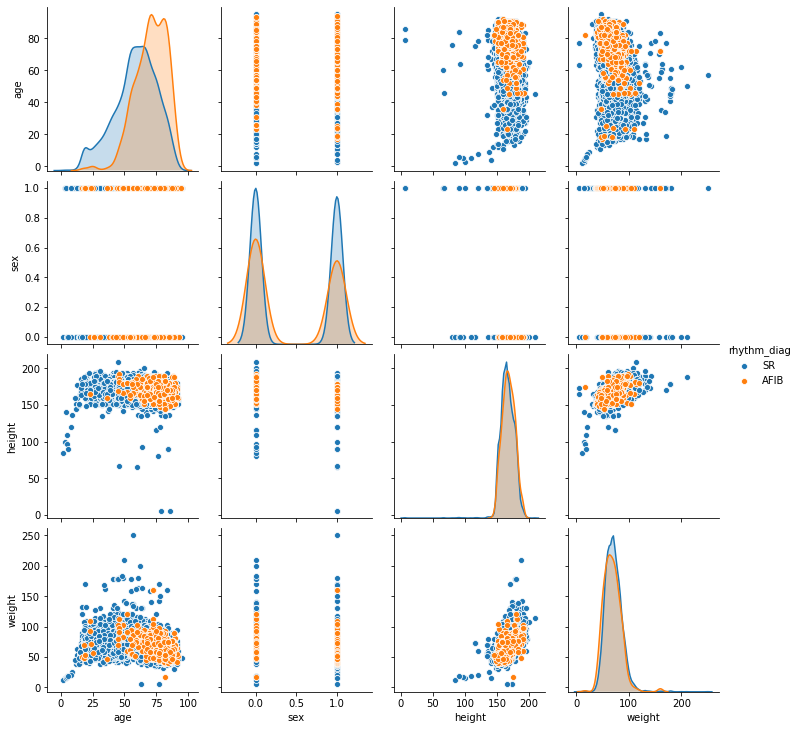

In [224]:
df = YI[YI.rhythm_diag != 'OTHER'][['age', 'sex', 'height', 'weight', 'rhythm_diag']]
sns.pairplot(df, hue='rhythm_diag');

In [200]:
YI[YI.rhythm_diag == 'AFIB'][:5]

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass,rhythm_class,rhythm_diag
ecg_id,,,,,,,,,,,,,,,,,,,,,
17,13619.0,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,1985-01-20 14:25:25,vorhof:hf 280 tachykardes vorhofflimmern uebe...,...,NaN,NaN,NaN,NaN,9,records100/00000/00017_lr,records500/00000/00017_hr,[],"[AFIB, AFLT]",AFIB
152,9796.0,70.0,1,NaN,NaN,NaN,3.0,AT-6 C,1986-03-01 11:06:12,fÖrmaksflimmer/-fladder hÖger el-axel lÅga qrs...,...,NaN,NaN,NaN,NaN,9,records100/00000/00152_lr,records500/00000/00152_hr,"[STTC, MI]",[AFIB],AFIB
282,437.0,91.0,0,175.0,NaN,3.0,1.0,AT-6 C 5.5,1986-09-10 11:31:08,premature ventricular contraction(s). atrial f...,...,NaN,NaN,1ES,NaN,5,records100/00000/00282_lr,records500/00000/00282_hr,"[STTC, HYP, CD, MI]",[AFIB],AFIB
307,6348.0,63.0,0,174.0,64.0,3.0,1.0,AT-6 C 5.5,1986-09-13 10:15:34,atrial fibrillation. qs complexes in v2 and ti...,...,NaN,NaN,NaN,NaN,1,records100/00000/00307_lr,records500/00000/00307_hr,"[STTC, HYP, MI]",[AFIB],AFIB
318,2034.0,56.0,0,163.0,94.0,11.0,1.0,AT-6 C 5.5,1986-09-14 11:41:19,atrial fibrillation. st segments are depressed...,...,NaN,NaN,NaN,NaN,10,records100/00000/00318_lr,records500/00000/00318_hr,[STTC],[AFIB],AFIB


In [202]:
YI[YI.rhythm_diag == 'SR'][:15]

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass,rhythm_class,rhythm_diag
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM],[SR],SR
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM],[SR],SR
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM],[SR],SR
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM],[SR],SR
6,19005.0,18.0,1,NaN,58.0,2.0,0.0,CS-12 E,1984-11-28 13:32:13,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,4,records100/00000/00006_lr,records500/00000/00006_hr,[NORM],[SR],SR
7,16193.0,54.0,0,NaN,83.0,2.0,0.0,CS-12 E,1984-11-28 13:32:22,"sinusrhythmus linkstyp t abnormal, wahrscheinl...",...,NaN,NaN,NaN,NaN,7,records100/00000/00007_lr,records500/00000/00007_hr,[NORM],[SR],SR
8,11275.0,48.0,0,NaN,95.0,2.0,0.0,CS-12 E,1984-12-01 14:49:52,sinusrhythmus linkstyp qrs(t) abnormal infe...,...,NaN,NaN,NaN,NaN,9,records100/00000/00008_lr,records500/00000/00008_hr,[MI],[SR],SR
9,18792.0,55.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-12-08 09:44:43,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,10,records100/00000/00009_lr,records500/00000/00009_hr,[NORM],[SR],SR
10,9456.0,22.0,1,NaN,56.0,2.0,0.0,CS-12 E,1984-12-12 14:12:46,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,9,records100/00000/00010_lr,records500/00000/00010_hr,[NORM],[SR],SR


In [225]:
YI.strat_fold.value_counts()

10    2203
3     2194
9     2193
2     2184
8     2179
7     2178
6     2178
1     2177
5     2176
4     2175
Name: strat_fold, dtype: int64

In [234]:
Xz = X[np.where(YI.strat_fold != 0)]
yz = YI[['age', 'sex', 'height', 'weight', 'rhythm_diag']]
Xz.shape, yz.shape

((21837, 1000, 12), (21837, 5))

In [235]:
#Filtering lead I
Xz = Xz[:,:,0]
Xz.shape 

(21837, 1000)

In [236]:
yz = yz.reset_index()
yz.head()

,ecg_id,age,sex,height,weight,rhythm_diag
0,1,56.0,1,NaN,63.0,SR
1,2,19.0,0,NaN,70.0,OTHER
2,3,37.0,1,NaN,69.0,SR
3,4,24.0,0,NaN,82.0,SR
4,5,19.0,1,NaN,70.0,SR


In [237]:
xz = pd.DataFrame(Xz)
xz.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.119,-0.116,-0.120,-0.117,-0.103,-0.097,-0.119,-0.096,-0.048,-0.037,...,0.198,0.194,0.115,0.107,0.107,0.106,0.090,0.069,0.086,0.022
1,0.004,-0.020,-0.053,-0.056,-0.062,-0.065,-0.061,-0.061,-0.064,-0.061,...,-0.035,-0.045,0.004,0.044,0.507,0.554,0.316,0.121,-0.326,-0.348
2,-0.029,-0.035,-0.054,-0.078,-0.088,-0.022,0.346,0.784,0.426,-0.076,...,-0.040,-0.051,-0.026,-0.032,-0.052,-0.039,-0.034,-0.029,-0.048,-0.049
3,-0.054,-0.053,-0.063,-0.060,-0.050,-0.054,-0.059,-0.058,-0.054,-0.051,...,-0.312,-0.511,-0.280,-0.076,-0.012,0.001,-0.003,0.026,0.026,0.028
4,-0.034,-0.038,-0.057,-0.066,-0.080,-0.085,-0.058,-0.061,-0.068,-0.065,...,0.005,0.001,0.003,0.013,0.018,-0.001,0.007,0.000,-0.003,-0.012


In [238]:
data = pd.concat([yz,xz], axis=1)
data.shape

(21837, 1006)

In [239]:
data.head()

,ecg_id,age,sex,height,weight,rhythm_diag,0,1,2,3,...,990,991,992,993,994,995,996,997,998,999
0,1,56.0,1,NaN,63.0,SR,-0.119,-0.116,-0.120,-0.117,...,0.198,0.194,0.115,0.107,0.107,0.106,0.090,0.069,0.086,0.022
1,2,19.0,0,NaN,70.0,OTHER,0.004,-0.020,-0.053,-0.056,...,-0.035,-0.045,0.004,0.044,0.507,0.554,0.316,0.121,-0.326,-0.348
2,3,37.0,1,NaN,69.0,SR,-0.029,-0.035,-0.054,-0.078,...,-0.040,-0.051,-0.026,-0.032,-0.052,-0.039,-0.034,-0.029,-0.048,-0.049
3,4,24.0,0,NaN,82.0,SR,-0.054,-0.053,-0.063,-0.060,...,-0.312,-0.511,-0.280,-0.076,-0.012,0.001,-0.003,0.026,0.026,0.028
4,5,19.0,1,NaN,70.0,SR,-0.034,-0.038,-0.057,-0.066,...,0.005,0.001,0.003,0.013,0.018,-0.001,0.007,0.000,-0.003,-0.012


In [243]:
X = data.drop(['ecg_id', 'age', 'sex', 'height', 'weight', 'rhythm_diag'], axis=1).values
y = data.rhythm_diag.values
X.shape, y.shape

((21837, 1000), (21837,))

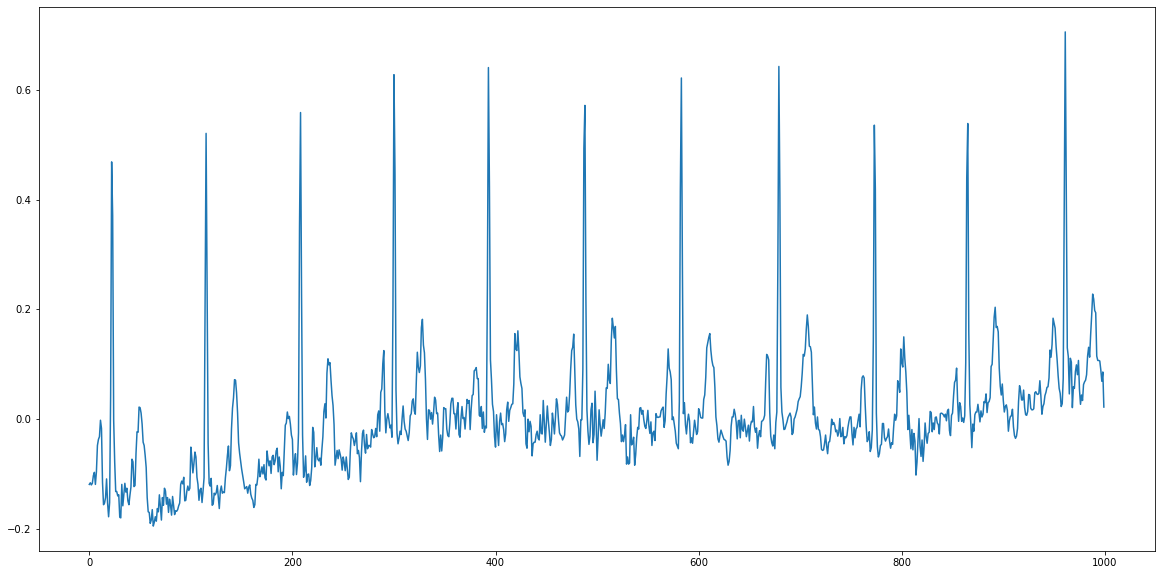

In [244]:
plt.plot(X[0]);

In [245]:
X.max(), X.min(), X.mean()

(4.398, -7.455, -0.001845856436323676)

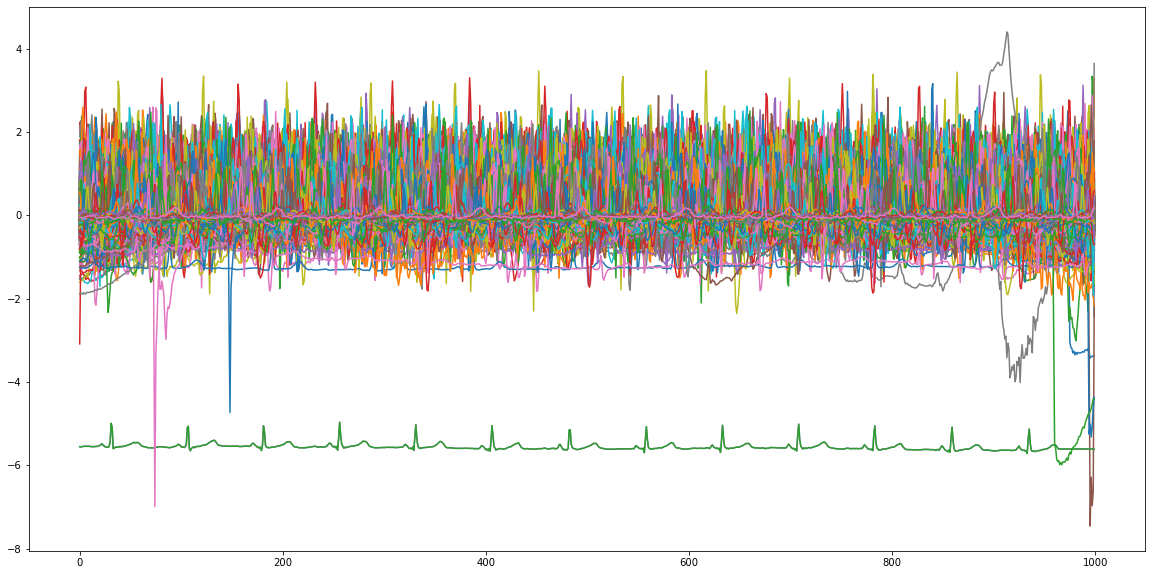

In [246]:
for i in range(len(X)): plt.plot(X[i])

# Tests 

In [132]:
# Split data into train and test
test_fold = 10

In [133]:
# Train
X_train = X[np.where(YI.strat_fold != test_fold)]
y_train = YI[(YI.strat_fold != test_fold)].rhythm_diag
X_train.shape, y_train.shape

((19634, 1000, 12), (19634,))

In [134]:
y_train[:10]

ecg_id
1        SR
2     OTHER
3        SR
4        SR
5        SR
6        SR
7        SR
8        SR
10       SR
11    OTHER
Name: rhythm_diag, dtype: object

In [135]:
# Test
X_test = X[np.where(YI.strat_fold == test_fold)]
y_test = YI[Y.strat_fold == test_fold].rhythm_diag
X_test.shape, y_test.shape

((2203, 1000, 12), (2203,))

In [136]:
X_test[0]

array([[-0.145, -0.097,  0.049, ..., -0.452, -0.269, -0.032],
       [-0.115, -0.083,  0.032, ..., -0.339, -0.246, -0.041],
       [-0.064, -0.06 ,  0.005, ..., -0.188, -0.199, -0.04 ],
       ...,
       [ 0.23 ,  0.292,  0.063, ...,  0.443,  0.362,  0.222],
       [ 0.251,  0.319,  0.067, ...,  0.498,  0.405,  0.261],
       [ 0.338,  0.361,  0.023, ...,  0.515,  0.447,  0.299]])

In [137]:
X_test[0][0][0]

-0.145

In [138]:
X_test[0][999][0]

0.338

### Filtering Lead I

In [139]:
X_train = X_train[:,:,0]
X_train.shape 

(19634, 1000)

In [140]:
X_test = X_test[:,:,0]
X_test.shape 

(2203, 1000)

In [146]:
X_train.max()

4.398

In [152]:
X_train.min()

-7.455

In [153]:
X_train.mean()

-0.0019483396149536484

In [145]:
X_train[0]

array([-0.119, -0.116, -0.12 , -0.117, -0.103, -0.097, -0.119, -0.096,
       -0.048, -0.037, -0.032, -0.002, -0.017, -0.115, -0.156, -0.153,
       -0.143, -0.109, -0.153, -0.178, -0.152,  0.043,  0.469,  0.371,
       -0.002, -0.078, -0.132, -0.132, -0.14 , -0.138, -0.179, -0.18 ,
       -0.119, -0.158, -0.138, -0.117, -0.133, -0.126, -0.149, -0.156,
       -0.139, -0.124, -0.073, -0.078, -0.123, -0.121, -0.062, -0.023,
       -0.024,  0.022,  0.021,  0.011, -0.009, -0.042, -0.048, -0.066,
       -0.088, -0.143, -0.169, -0.17 , -0.19 , -0.184, -0.165, -0.195,
       -0.188, -0.178, -0.186, -0.163, -0.169, -0.138, -0.159, -0.184,
       -0.143, -0.157, -0.126, -0.131, -0.155, -0.143, -0.17 , -0.146,
       -0.157, -0.175, -0.141, -0.158, -0.174, -0.167, -0.168, -0.165,
       -0.158, -0.153, -0.119, -0.113, -0.118, -0.106, -0.149, -0.148,
       -0.132, -0.122, -0.13 , -0.126, -0.051, -0.072, -0.098, -0.081,
       -0.06 , -0.069, -0.106, -0.119, -0.148, -0.129, -0.126, -0.152,
      

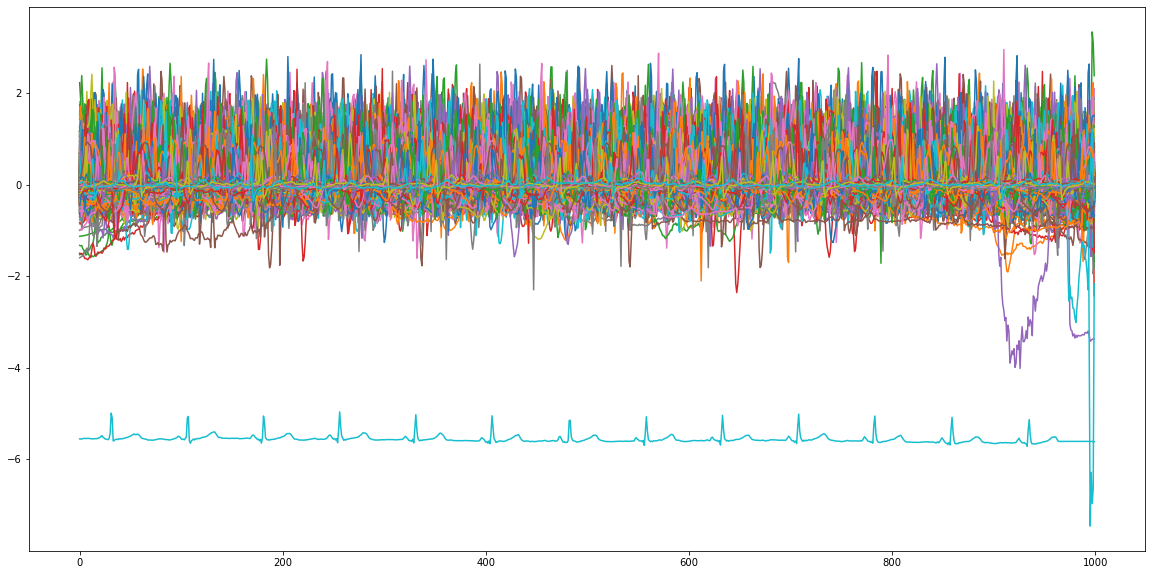

In [159]:
for i in range(10000): plt.plot(X_train[i])

In [144]:
y_test[9]

'SR'

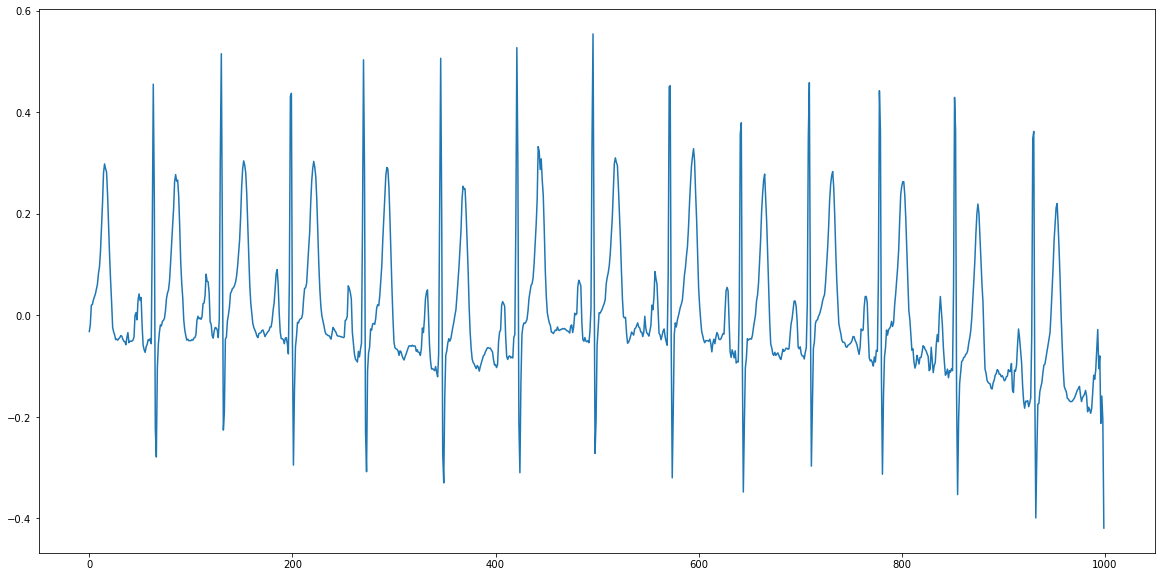

In [151]:
plt.plot(X_train[5]);

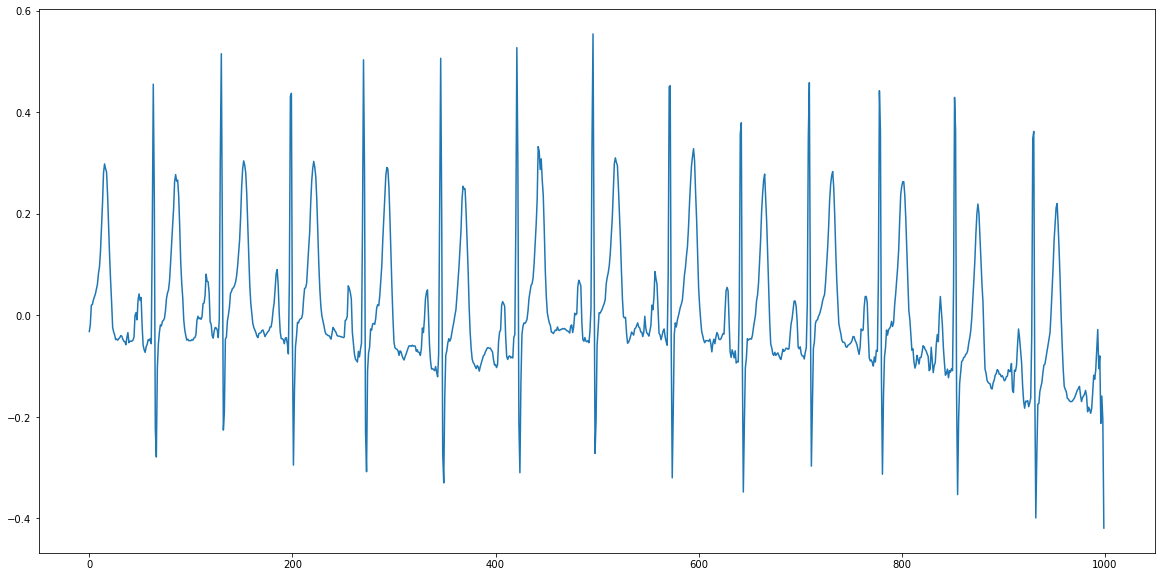

In [201]:
plt.plot(X_train[5]);